# Análise e Exploração dos dados de Iris

<p>Este é um dos primeiros conjuntos de dados usados ​​na literatura sobre métodos de classificação e amplamente usado em estatística e aprendizado de máquina. O conjunto de dados contém 3 classes de 50 instâncias cada, onde cada classe se refere a um tipo de planta de íris. Uma classe é linearmente separável das outras 2; as últimas não são linearmente separáveis ​​umas das outras.</p>

OBJETIVO: Classificar qual é a classe de cada planta sendo 3 tipos distintos.

In [78]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb



In [2]:
df_iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df_iris['species'] = load_iris().target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [4]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Matriz de Correlação

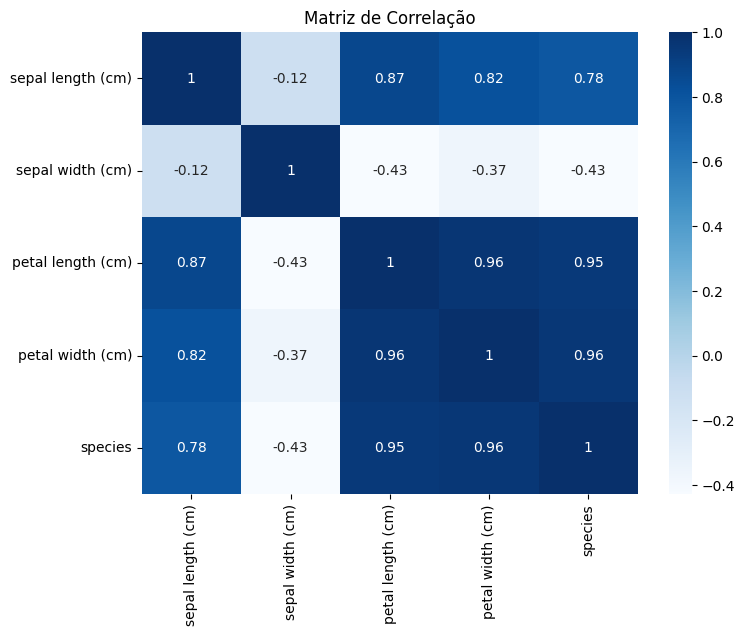

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(df_iris.corr(), annot=True, cmap='Blues')
plt.title('Matriz de Correlação')

plt.show()

<p>
Vemos que algumas caracteristicas tem muita relação umas com as outras como o tamanho da petala com sua largura.

E tambem a relação de especie com as duas caractericas tanto de tamanho quanto de largura, isso pode definir bem as classes de cada uma. Porém, é possivel que vamos ter problema na classificação pois acredito que caractericas altas de uma classe possa se confundir com caracteristas baixas de uma outra classe.

Continuaremos a analise para nos trazer mais respostas.
</p>

##### Grafico de Dispersão

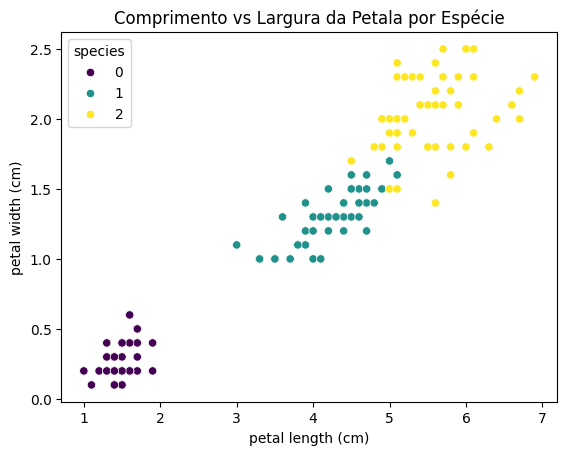

In [6]:
sns.scatterplot(data=df_iris, x= 'petal length (cm)', y= 'petal width (cm)', hue='species', palette='viridis')
plt.title('Comprimento vs Largura da Petala por Espécie')
plt.show()

<p>
Como estamos vendo as menores caracteristicas da classe 2 estão bem proximas das maiores caracteristicas da classe 1.

E podemos perceber que a classe 0 é bem diferente das outras duas.
</p>

##### Pairplot

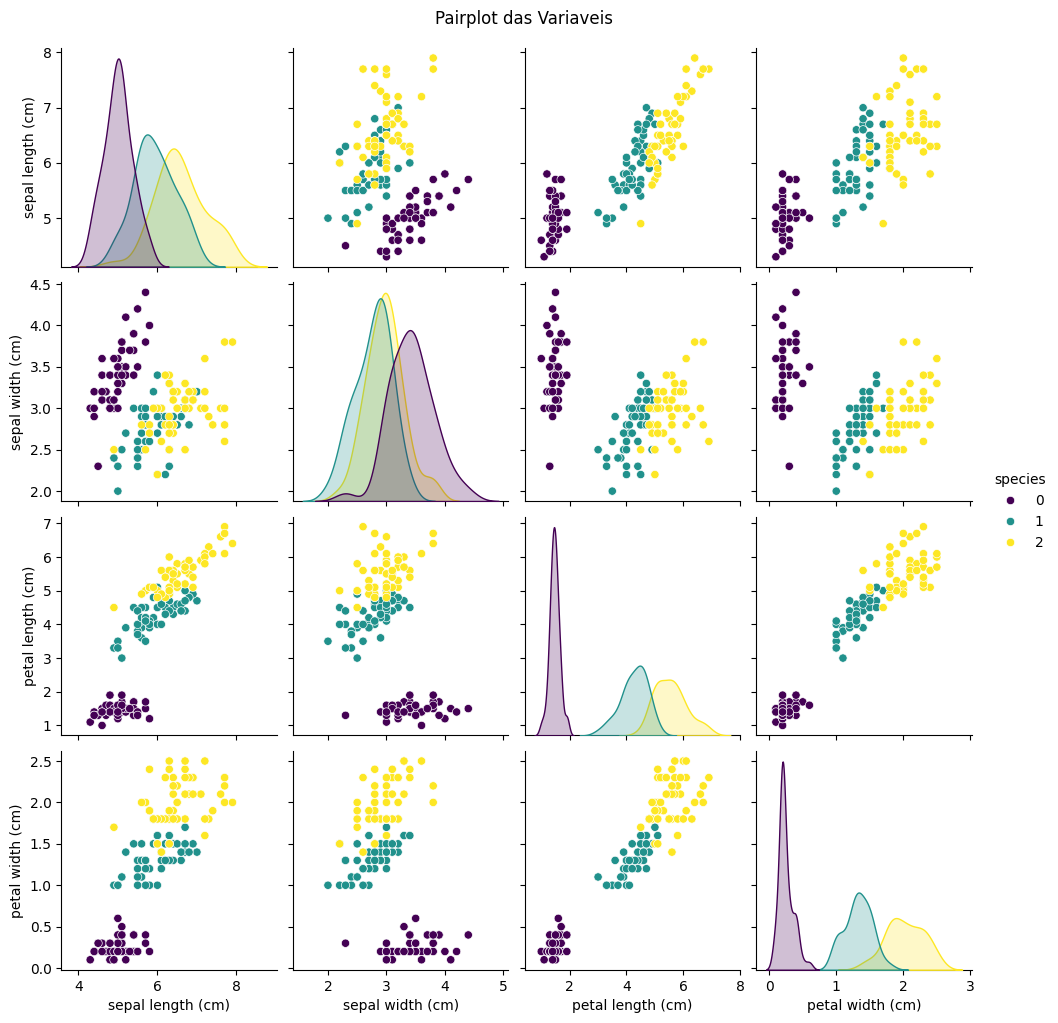

In [7]:
sns.pairplot(df_iris, hue='species', palette='viridis')
plt.suptitle('Pairplot das Variaveis', y=1.02)
plt.show()

<p>
Com o Plairplot nos ajuda a entender mais ainda a variação das variaveis observadas e vemos suas caracteristicas são bem definidas para enterdermos os padrões.

Podemos ver que as classes 1 e 2 são realmente bem proximas em todas as suas caracteristicas. E a classe 0 é muito bem definida e distinta.
</p>

##### Boxplot

<ipython-input-8-0bdc81dd8211>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_iris, x= 'species', y='petal length (cm)', palette='viridis')


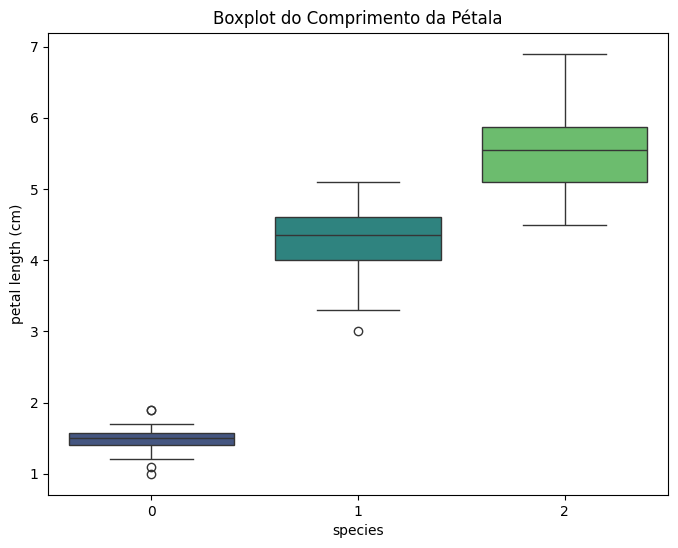

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_iris, x= 'species', y='petal length (cm)', palette='viridis')
plt.title('Boxplot do Comprimento da Pétala')
plt.show()

<p>
O Boxplot nos ajuda a entender um pouco melhor como é a relação entre as duas especies 1 e 2.
A mediana da especie 1 em relação a especie 2 são bem distantes, isso mostra que o comprimento das pétalas são bem diferentes entre a maioria das amostras, isso pode nos ajudar na hora de classificar cada uma das especies.
</p>

# Modelos

In [10]:
df_iris['target'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [65]:
y = df_iris['species']
X = df_iris.drop(['species', 'target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [67]:
# K-Nearest Neighbors(KNN)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [68]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [69]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [72]:
# XGBoost
xgb = xgb.XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

In [73]:
# SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [74]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

In [75]:
def metricas(y_test, y_pred, nome_modelo):
    print(nome_modelo)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Acurácia {nome_modelo}: {accuracy}")
    print(f"Precisão {nome_modelo}: {precision}")
    print(f"Revocação {nome_modelo}: {recall}")
    print(f"F1-Score {nome_modelo}: {f1}")


In [76]:
metricas(y_test, knn_pred, 'KNN')
metricas(y_test, dt_pred, 'Decision Tree')
metricas(y_test, rf_pred, 'Random Forest')
metricas(y_test, xgb_pred, 'XGBoost')
metricas(y_test, svm_pred, 'SVM')
metricas(y_test, nb_pred, 'Naive Bayes')

KNN
Acurácia KNN: 1.0
Precisão KNN: 1.0
Revocação KNN: 1.0
F1-Score KNN: 1.0
Decision Tree
Acurácia Decision Tree: 1.0
Precisão Decision Tree: 1.0
Revocação Decision Tree: 1.0
F1-Score Decision Tree: 1.0
Random Forest
Acurácia Random Forest: 1.0
Precisão Random Forest: 1.0
Revocação Random Forest: 1.0
F1-Score Random Forest: 1.0
XGBoost
Acurácia XGBoost: 1.0
Precisão XGBoost: 1.0
Revocação XGBoost: 1.0
F1-Score XGBoost: 1.0
SVM
Acurácia SVM: 1.0
Precisão SVM: 1.0
Revocação SVM: 1.0
F1-Score SVM: 1.0
Naive Bayes
Acurácia Naive Bayes: 0.9777777777777777
Precisão Naive Bayes: 0.9793650793650793
Revocação Naive Bayes: 0.9777777777777777
F1-Score Naive Bayes: 0.9777448559670782


In [79]:
from sklearn.model_selection import cross_val_score

modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Naive Bayes": GaussianNB()
}

for nome_modelo, modelo in modelos.items():
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    print(f"{nome_modelo} - Acurácia média (5-fold): {scores.mean():.3f} - Desvio padrão: {scores.std():.3f}")


KNN - Acurácia média (5-fold): 0.967 - Desvio padrão: 0.021
Decision Tree - Acurácia média (5-fold): 0.953 - Desvio padrão: 0.034
Random Forest - Acurácia média (5-fold): 0.967 - Desvio padrão: 0.021
XGBoost - Acurácia média (5-fold): 0.953 - Desvio padrão: 0.016
SVM - Acurácia média (5-fold): 0.967 - Desvio padrão: 0.021
Naive Bayes - Acurácia média (5-fold): 0.953 - Desvio padrão: 0.027


# Conclusão
<p> Este conjunto de dados é muito pequeno e bem definido, tornando irreal a preocupação de que os modelos encontrariam dificuldades em classificar cada classe. Os modelos se saíram muito bem; no entanto, devido ao pequeno número de amostras, acredito que esse alto nível de acurácia em todos os modelos se deve ao overfitting, pois os modelos provavelmente memorizaram os resultados.
</p>
<p> O Cross-Validation utiliza uma metodologia diferente para os treinos. Como dividimos os dados em cinco subconjuntos, em cada iteração do Cross-Validation ele treinava com quatro subconjuntos e testava com o que sobrava, o que acaba gerando um resultado mais realista por passar por diferentes etapas de treino. Por isso, o resultado se mostra inferior, mas é mais confiável. </p>
<p> Vemos uma diferença nas médias dos modelos no Cross-Validation, mas essa diferença é desprezível, já que o conjunto de dados é muito simples e pequeno. Não é necessário avaliar qual modelo se destacou, pois qualquer um deles nos trará as respostas que precisamos. </p>
<p> O estudo nos ensinou a utilizar vários modelos e a aprender algumas técnicas de visualização. </p>
